# Exercise 3: Advanced Information Retrieval

## Question 1 - Latent Semantic Indexing


In this exercise, we will run latent semantic indexing on a term-document matrix using python numpy library.

Suppose we are given the following term-document matrix containing eleven terms and four documents $d_1$ , $d_2$ , $d_3$ and $d_4$:

$
M =
  \begin{bmatrix}
    d_1 & d_2 & d_3 & d_4 \\ 
	1 & 1 & 1 & 1  \\
	0 & 1 & 1 & 1 \\
	1 & 0 & 0 & 0 \\
	0 & 1 & 0 & 0 \\
    1 & 0 & 0 & 0 \\
    1 & 0 & 1 & 2 \\
    1 & 1 & 1 & 1 \\
    1 & 1 & 1 & 0 \\
    1 & 0 & 0 & 0 \\
    0 & 2 & 1 & 1 \\
    0 & 1 & 1 & 0 \\
  \end{bmatrix}
$


<br>

###  Question 1.a

Compute the singular value decomposition of the term-document matrix M. Print the values of the output matrices $K$, $S$ and $D^t$.


<b>Hint:</b> Use the function numpy.linalg.svd. More details of this function can be found here at this link:

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html


Here's sample code:

In [1]:
# import Python matrix operations library
import numpy as np

In [2]:
#set M matrix using the given values.
M = np.array([[1,1,1,1], 
     [0,1,1,1],
     [1,0,0,0],
     [0,1,0,0],
     [1,0,0,0],
     [1,0,1,2],
     [1,1,1,1],
     [1,1,1,0],
     [1,0,0,0],
     [0,2,1,1],
     [0,1,1,0]])

# compute SVD
K, S_diag, Dt = np.linalg.svd(M, full_matrices=0)
S = np.diag(S_diag)

print("K")
print(K)
print()
print("S")
print(S)
print()
print("Dt")
print(Dt)

np.allclose(M, np.dot(K, np.dot(S, Dt)))

K
[[-0.41291701 -0.12294407  0.05933248 -0.03660797]
 [-0.3359611   0.1962311  -0.25246121  0.11968319]
 [-0.07695592 -0.31917516  0.31179369 -0.15629115]
 [-0.11909604  0.2663899   0.20432237 -0.52093504]
 [-0.07695592 -0.31917516  0.31179369 -0.15629115]
 [-0.39922386 -0.49767812 -0.57172873  0.04465203]
 [-0.41291701 -0.12294407  0.05933248 -0.03660797]
 [-0.30751414 -0.01459992  0.48607132  0.40306708]
 [-0.07695592 -0.31917516  0.31179369 -0.15629115]
 [-0.45505713  0.462621   -0.04813884 -0.40125186]
 [-0.23055822  0.30457524  0.17427762  0.55935823]]

S
[[4.78695453 0.         0.         0.        ]
 [0.         2.31848919 0.         0.        ]
 [0.         0.         1.762346   0.        ]
 [0.         0.         0.         0.77705263]]

Dt
[[-0.36838448 -0.57010731 -0.53356439 -0.50455879]
 [-0.74000417  0.61762211  0.0885323  -0.25119473]
 [ 0.54948837  0.36008671 -0.05294924 -0.75206148]
 [-0.12144645 -0.40479395  0.83944473 -0.34165065]]


True


###  Question 1.b

Are the values of $S$ sorted? Perform latent semantic indexing by selecting the first two largest singular values of the matrix $S$.

<b>Hint:</b> See the lecture slides on latent semantic indexing for more details. A sub-matrix of a numpy matrix can be computed using indexing operations (see https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html).


In [3]:
s = 2
# Yes, the values of S are sorted
K_sel = K[:, :s]
S_sel = S[:s, :s]
Dt_sel = Dt[:s, :]

###  Question 1.c

Given the query $q$:

$
q =
  \begin{bmatrix}
	0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 1 \\ 1 \\
  \end{bmatrix}
$


Map query $q$ into the new document space $D$. The new query is referred to as $q^*$. 

<b>Hint:</b> Use the formulation for mapping queries provided in the lecture slides. You can also use np.linalg.inv function for computing the inverse of a matrix.

In [4]:
q = np.array([0,0,0,0,0,1,0,0,0,1,1]).reshape([11,1])
q_star = q.transpose().dot(K_sel.dot(np.linalg.inv(S_sel))).flatten()



###  Question 1.d

Arrange the documents based on the cosine similarity measure between $q^*$ and the new documents in the space $D$.

<b>Hint:</b> Use the cosine similarity function from the previous exercise on vector space retrieval.


In [5]:
# Compute cosine similarity
import math
def cosine_similarity(v1, v2):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]
        y = v2[i]
        sumxx += x * x
        sumyy += y * y
        sumxy += x * y
    if sumxy == 0:
        return 0
    else:
        return sumxy / math.sqrt(sumxx * sumyy)

def sort_documents_query(Dt_sel, q_star):
    sim_dict = {}
    for i, d_s in enumerate(Dt_sel.transpose()):
        sim_dict[i] = cosine_similarity(d_s, q_star)
    return sorted(sim_dict, key=sim_dict.get, reverse=True)

In [6]:
sort_documents_query(Dt_sel, q_star)

[2, 1, 3, 0]


###  Question 1.e

Does the order of documents change if document $d_3$ is dropped? If yes, why? 
If no, how should $d_3$ be modified to change the document ordering?


In [7]:
M_mod = M[:,:3]

# compute SVD
K_mod, S_diag_mod, Dt_mod = np.linalg.svd(M_mod, full_matrices=0)
S_mod = np.diag(S_diag_mod)

s = 2
# Yes, the values of S are sorted
K_sel_mod = K_mod[:, :s]
S_sel_mod = S_mod[:s, :s]
Dt_sel_mod = Dt_mod[:s, :]

q_star_mod = q.transpose().dot(K_sel_mod.dot(np.linalg.inv(S_sel_mod))).flatten()
sort_documents_query(Dt_sel_mod, q_star_mod)

[1, 2, 0]

We can see that the order does not change if we use all 3 singular values of the matrix  S, but it does change if we use only 2. The change is due to the fact that we are comparing the query with the documents as representations in the "reduced" concept space.

By dropping one document, the concept space changes. If we keep only the two concepts related to the two largest singular values, the concepts kept will depend on the documents considered to obtain the concepts.



### Question 1.f [Optional]

Run latent semantic indexing for the document collection presented in the previous exercise (presented here as well):

  DocID | Document Text
  ------|------------------
  1     | How to Bake Breads Without Baking Recipes
  2     | Smith Pies: Best Pies in London
  3     | Numerical Recipes: The Art of Scientific Computing
  4     | Breads, Pastries, Pies, and Cakes: Quantity Baking Recipes
  5     | Pastry: A Book of Best French Pastry Recipes

Now, for the query $Q=$''<i>baking</i>'', find the top ranked documents according to LSI (use three singular values). 

<b>Hint:</b> Use the code for computing document_vectors from the last exercise. However note that document_vectors represent document-term matrix whereas LSI uses term-document matrix.

In [8]:
def read_documents(filename):
    # Read documents from file (each line is a document)
    with open(filename) as f:
        content = f.readlines()
    original_documents = [x.strip() for x in content]
    documents = [tokenize(d).split() for d in original_documents]
    return documents, original_documents

def tokenize(text):
    """Given a string, removes the punctuation and returns
    array of stemmed words.
    """
    import string
    import nltk
    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    # Remove punctuation
    text = "".join([ch for ch in text if ch
        not in string.punctuation])
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Return stemmed document
    return " ".join([stemmer.stem(word.lower())
        for word in tokens])

def create_vocabulary(documents):
    # Create the vocabulary
    # flatten 'documents'
    from nltk.corpus import stopwords
    vocabulary = set([item for sublist in documents
        for item in sublist])
    # remove stopwords and sort
    vocabulary = [word for word in vocabulary if
        word not in stopwords.words('english')]
    vocabulary.sort()
    return vocabulary

def vectorize(document, vocabulary, idf):
    """Returns TF-IDF as TF*IDF
    Computes TF as the term frequency, which means
    ftd/max_count
    where:
        ftd = nb. of times term t occurs in doc d
        max_count = nb. of times most common term occurs in d
    This is known as 'augmented frequency' and prevents
    a bias towards longer documents.
    """
    from collections import Counter
    tfidf = [0] * len(vocabulary)
    tf = [0] * len(vocabulary)
    counts = Counter(document)
    # get the count for most common word
    max_count = counts.most_common(1)[0][1]
    for i, term in enumerate(vocabulary):
        tf[i] = counts[term] / max_count
        tfidf[i] = tf[i] * idf[term]
    return tfidf

def idf_values(vocabulary, documents):
    """Computes IDF as log(N/nt)
    where nt is the number of documents where the
    term t appears.
    """
    from collections import Counter
    idf = {}
    num_documents = len(documents)
    for term in vocabulary:
        idf[term] = [term in x for x in documents]
        idf[term] = math.log(num_documents /
            Counter(idf[term])[True], math.e)
    return idf

def vectorize_query(query, vocabulary, idf):
    from nltk.stem import PorterStemmer
    stemmer = PorterStemmer()
    # get array of vectorized query words
    q = query.split()
    q = [stemmer.stem(w) for w in q]
    # get the vector for the query
    query_vector = vectorize(q, vocabulary, idf)
    return query_vector

In [9]:
documents, original_documents = read_documents("bread.txt")
vocabulary = create_vocabulary(documents)
idf = idf_values(vocabulary, documents)
document_vectors = [vectorize(d, vocabulary, idf) for d in documents]

In [10]:
# compute SVD
M = np.array(document_vectors).transpose()
K, S_diag, Dt = np.linalg.svd(M, full_matrices=0)
S = np.diag(S_diag)

s = 3
K_sel = K[:, :s]
S_sel = S[:s, :s]
Dt_sel = Dt[:s, :]

In [11]:
q = np.array(vectorize_query("baking", vocabulary, idf))
q_star = q.transpose().dot(K_sel.dot(np.linalg.inv(S_sel))).flatten()

sort_documents_query(Dt_sel, q_star)

[0, 3, 2, 4, 1]

<br>
<br>
<br>
<br>


## Question 2 - Word Embeddings

In this exercise, we would train word embeddings using a state-of-the-art embeddings library fastText. The first step of the exercise is to install the fastText library. Proceed with the following steps:

### FastText installation


#### Run these commands on the shell terminal:

> wget https://github.com/facebookresearch/fastText/archive/v0.1.0.zip <br>
> unzip v0.1.0.zip<br>
> cd fastText-0.1.0 <br>
> make<br>

<br>

Move the epfldocs.txt file (provided in the last exercise) to the current directory. Sample command (linux) for copying the file into current directory is as follows:

> cp directory_path/epfldocs.txt ./

<br>

### Generate Embeddings

Further, generate fasttext embeddings for the epfldocs.txt file using the following command:

> ./fasttext skipgram -input epfldocs.txt -output model_epfldocs


The above command generates word embeddings and stores them in a file named model_epfldocs.vec.

<br>

### Load Embeddings

In the second phase of this exercise, we will load these embeddings into memory using python and visualize them.
Use the following python code to load the embeddings into memory:<br><br>



In [12]:
import sys
import codecs
import numpy as np

directory_path = "fastText-0.1.0/"

def load_embeddings(file_name):
    with codecs.open(file_name, 'r', 'utf-8') as f_in:
        lines = f_in.readlines()
        lines = lines[1:]
        vocabulary, wv = zip(*[line.strip().split(' ', 1) for line in lines])
    wv = np.loadtxt(wv)
    return wv, vocabulary


# Replace the path based on your own machine.
word_embeddings, vocabulary = load_embeddings(directory_path + 'model_epfldocs.vec')




### Visualize Embeddings

In the third phase of this exercise, we will visualize the generated embeddings. First install the tsne library using pip:

> $ pip install tsne

In [13]:
import numpy as np
import tsne
import matplotlib.pyplot as plt
import logging

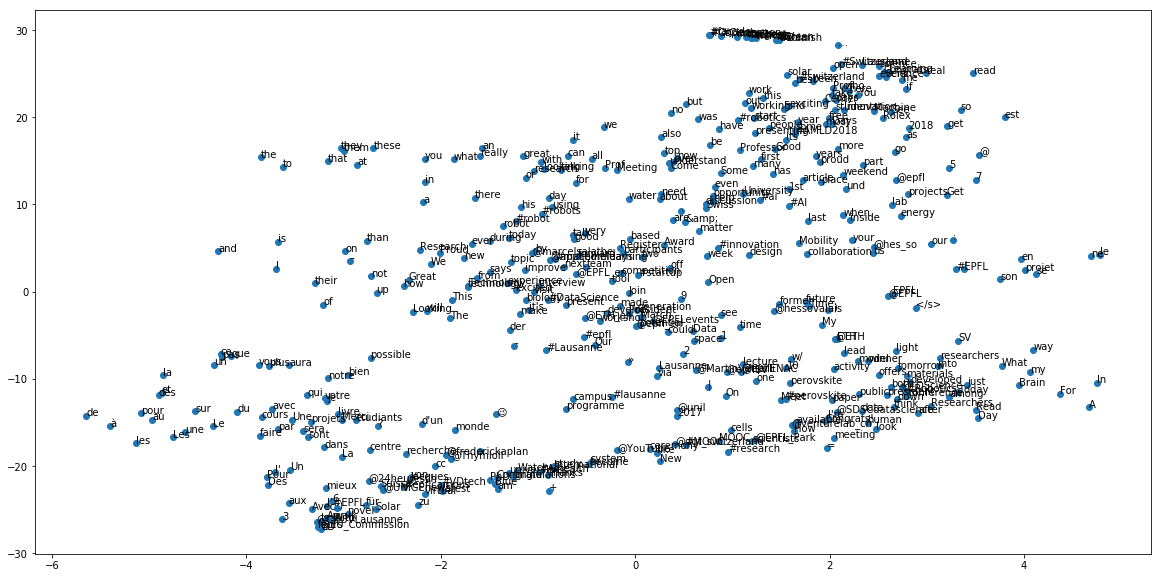

In [14]:
np.random.seed(12)
rand_state = np.random.RandomState(12)
vis_data = tsne.bh_sne(word_embeddings, random_state=rand_state)

vis_data_x = vis_data[:,0]
vis_data_y = vis_data[:,1]

plt.figure(figsize=(20,10))
plt.scatter(vis_data_x, vis_data_y)
for label, x, y in zip(vocabulary, vis_data_x, vis_data_y):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

### Question 2.a

Observe the plot of word embeddings. Do you observe any patterns?





### Question 2.b

Write a python function to find the most similar terms for a given term. The similarity between two terms is defined as the cosine similarity between their corresponding word embeddings.

Find the top 3 terms that are most similar to 'la', 'EPFL', '#robot', 'this', 


In [15]:
def get_top_3(t1, vocabulary):
    t1_idx = vocabulary.index(t1)
    keys = range(1, 4)
    values = [(-1, '')]*3
    sim_best = dict(zip(keys, values))
    for t2_idx, t2 in enumerate(vocabulary):
        if not t2 == t1:
            sim = cosine_similarity(vis_data[t1_idx], vis_data[t2_idx])
            if sim > sim_best[3][0]:
                if sim < sim_best[2][0]:
                    sim_best[3] = (sim, t2)
                elif sim < sim_best[1][0]:
                    sim_best[3] = sim_best[2]
                    sim_best[2] = (sim, t2)
                else:
                    sim_best[3] = sim_best[2]
                    sim_best[2] = sim_best[1]
                    sim_best[1] = (sim, t2)
    return sim_best

In [26]:
for t1 in ['la', 'EPFL', '#robot', 'this']:
    print(t1)
    ans = get_top_3(t1, vocabulary)
    print(ans)
    print()

la
{1: (0.9999425834518598, 'un'), 2: (0.9997609989652507, "it's"), 3: (0.9996139293553477, 'make')}

EPFL
{1: (0.9955105555523077, '@EPFL'), 2: (0.8969793608626492, 'son'), 3: (0.8884504444360778, '</s>')}

#robot
{1: (0.9999996246200233, 'there'), 2: (0.9999755513976263, 'forward'), 3: (0.999946017590827, 'you')}

this
{1: (0.9999973870703127, 'start'), 2: (0.9999964326753993, 'working'), 3: (0.9999938414295857, 'solar')}




### Question 2.c [Optional]

Download the text file using the following command:

> wget http://mattmahoney.net/dc/text8.zip -O text8.gz <br>
> tar -xvf text8.gz 


The above command creates a text file named 'text8'. Regenerate the fasttext embeddings using the text8 file. Plot the word embeddings for first 1000 terms in the vocabulary.



### Question 2.d [Optional]

Observe the word embeddings that are visualized in this link http://www.anthonygarvan.com/wordgalaxy/ . Can you make some interesting observations? 